In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.concat([pd.read_csv(f"../data/interim/horses{year}.csv", sep=";", usecols=["horse_genyId", "raceId", "results_totalTimeMs", "musique", "moneyWon", "results_position"])for year in range(2010, 2019)])

In [3]:
df_missing = df.isna().sum()/len(df)
df_missing

raceId                 0.000000
musique                0.008354
horse_genyId           0.002449
results_position       0.243184
results_totalTimeMs    0.701370
moneyWon               0.455888
dtype: float64

In [4]:
df = df[~df["horse_genyId"].isna()]
df.head()

,raceId,musique,horse_genyId,results_position,results_totalTimeMs,moneyWon
0,geny:312873,Inédit,2170663.0,5.0,NaN,NaN
1,geny:312873,Inédit,2170664.0,2.0,NaN,NaN
2,geny:312873,Inédit,2170665.0,4.0,NaN,NaN
3,geny:312873,Inédit,2170666.0,7.0,NaN,NaN
4,geny:312873,Inédit,2170667.0,6.0,NaN,NaN


In [5]:
import re
def clean_music_to_list(musique):
    '''Nettoie la musique (retire les lettres et supprime les nombres entre parenthèses)
    '''
    if pd.isnull(musique): return []
    musique = re.sub(r'\([^)]*\)', "", musique)
    musique = re.sub("[^0-9]", " ", musique)
    musique = re.sub("0", "10", musique)
    musique = musique.split()
    return musique
df["cleaned_music"] = df["musique"].apply(clean_music_to_list)

In [6]:
df[df["moneyWon"].isna()]

,raceId,musique,horse_genyId,results_position,results_totalTimeMs,moneyWon,cleaned_music
0,geny:312873,Inédit,2170663.0,5.0,NaN,NaN,[]
1,geny:312873,Inédit,2170664.0,2.0,NaN,NaN,[]
2,geny:312873,Inédit,2170665.0,4.0,NaN,NaN,[]
3,geny:312873,Inédit,2170666.0,7.0,NaN,NaN,[]
4,geny:312873,Inédit,2170667.0,6.0,NaN,NaN,[]
...,...,...,...,...,...,...,...
1505763,pmu_race:31122018/R3/C5,3p0p0p7p1p,2345664.0,5.0,NaN,NaN,"[3, 10, 10, 7, 1]"
1505764,pmu_race:31122018/R3/C6,2p2p1p1p1p,2432163.0,1.0,186400.0,NaN,"[2, 2, 1, 1, 1]"
1505765,pmu_race:31122018/R3/C6,0p6p2p3p0p,2419482.0,3.0,NaN,NaN,"[10, 6, 2, 3, 10]"
1505766,pmu_race:31122018/R3/C6,0p3p2p0p0p,2496365.0,2.0,NaN,NaN,"[10, 3, 2, 10, 10]"


In [7]:
df["empty_music"] = df["cleaned_music"].apply(lambda x : len(x)==0)
df.head()

,raceId,musique,horse_genyId,results_position,results_totalTimeMs,moneyWon,cleaned_music,empty_music
0,geny:312873,Inédit,2170663.0,5.0,NaN,NaN,[],True
1,geny:312873,Inédit,2170664.0,2.0,NaN,NaN,[],True
2,geny:312873,Inédit,2170665.0,4.0,NaN,NaN,[],True
3,geny:312873,Inédit,2170666.0,7.0,NaN,NaN,[],True
4,geny:312873,Inédit,2170667.0,6.0,NaN,NaN,[],True


In [8]:
df = df[(~df["moneyWon"].isna()) | df["empty_music"]]
df["moneyWon"] = df["moneyWon"].fillna(0)
df["results_position"] = df["results_position"].fillna(10)
df.head()

,raceId,musique,horse_genyId,results_position,results_totalTimeMs,moneyWon,cleaned_music,empty_music
0,geny:312873,Inédit,2170663.0,5.0,NaN,0.0,[],True
1,geny:312873,Inédit,2170664.0,2.0,NaN,0.0,[],True
2,geny:312873,Inédit,2170665.0,4.0,NaN,0.0,[],True
3,geny:312873,Inédit,2170666.0,7.0,NaN,0.0,[],True
4,geny:312873,Inédit,2170667.0,6.0,NaN,0.0,[],True


In [9]:
df.isna().sum()/len(df)

raceId                 0.000000
musique                0.014166
horse_genyId           0.000000
results_position       0.000000
results_totalTimeMs    0.565700
moneyWon               0.000000
cleaned_music          0.000000
empty_music            0.000000
dtype: float64

In [10]:
courses = pd.read_csv("../data/interim/courses.csv", index_col=0)
mask = (courses.count() >= 20000)
print(f'Sélection de {np.sum(mask)} colonnes')
filter = [column for i, column in enumerate(courses.columns.to_list()) if mask[i] and not("photo" in column)]
courses = courses[filter]
courses["name_race"]=courses["name_race"].apply(lambda x : x.split("_", maxsplit=2 ))
courses[["date", "reunion_cat", "nom"]] = pd.DataFrame(courses["name_race"].to_list())
courses.head()

c:\Info\KLAP\horse races prediction\env\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (31,32,42,43,45,49,50,51,52,53,54,57,58,59,62,63,64,67,68,69,70,71,73,76,77,78,80,83,84,85,87,90,91,92,94,97,98,99,101,104,105,106,108,111,112,113,115,118,119,120,122,125,126,127,129,132,133,134,136,139,140) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Sélection de 48 colonnes


,fieldQuality,sexCategory,raceCategory,raceType,raceSecondType,price_total,distance,fieldType,ropeSide,fieldName,...,recul_value,penetrometer,duration,price_first,price_fifth,ageCategory,ecuries_0_ecurieId,date,reunion_cat,nom
0,GOOD,M,GALOP,CLASS_F,A_CONDITIONS,24000.0,1600,TURF,RIGHT,Moyenne piste,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-09-18,R1C1,PRIX DE FONTENOY
1,GOOD,F,GALOP,CLASS_F,A_CONDITIONS,24000.0,1600,TURF,RIGHT,Moyenne piste,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-09-18,R1C2,PRIX DE LA CASCADE
2,GOOD,M,GALOP,GROUPE_III,NaN,80000.0,1600,TURF,RIGHT,Moyenne piste,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-09-18,R1C3,PRIX DES CHENES
3,GOOD,NaN,GALOP,CLASS_D,HANDICAP,48000.0,2000,TURF,RIGHT,Grande piste,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-09-18,R1C4,PRIX DE LA TABLE
4,GOOD,NaN,GALOP,GROUPE_III,NaN,80000.0,2000,TURF,RIGHT,Grande piste,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-09-18,R1C5,PRIX DU PRINCE D'ORANGE


In [11]:
df = df.merge(courses[["raceId", "date"]], on="raceId")
df.head()

,raceId,musique,horse_genyId,results_position,results_totalTimeMs,moneyWon,cleaned_music,empty_music,date
0,geny:312873,Inédit,2170663.0,5.0,NaN,0.0,[],True,2010-09-18
1,geny:312873,Inédit,2170664.0,2.0,NaN,0.0,[],True,2010-09-18
2,geny:312873,Inédit,2170665.0,4.0,NaN,0.0,[],True,2010-09-18
3,geny:312873,Inédit,2170666.0,7.0,NaN,0.0,[],True,2010-09-18
4,geny:312873,Inédit,2170667.0,6.0,NaN,0.0,[],True,2010-09-18


In [12]:
df["date"] = pd.to_datetime(df["date"])
df.head()

,raceId,musique,horse_genyId,results_position,results_totalTimeMs,moneyWon,cleaned_music,empty_music,date
0,geny:312873,Inédit,2170663.0,5.0,NaN,0.0,[],True,2010-09-18
1,geny:312873,Inédit,2170664.0,2.0,NaN,0.0,[],True,2010-09-18
2,geny:312873,Inédit,2170665.0,4.0,NaN,0.0,[],True,2010-09-18
3,geny:312873,Inédit,2170666.0,7.0,NaN,0.0,[],True,2010-09-18
4,geny:312873,Inédit,2170667.0,6.0,NaN,0.0,[],True,2010-09-18


## Train and test sets
The training set will be a well chosen percentage of all races. The actual model uses a single horse performance as input. Like we would do for actual betting, we will use all past races as training, and new ones as training.

In [13]:
def get_list_results(race_df):
    return(pd.Series(race_df["results_position"].values, index =race_df["horse_genyId"].values ))

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data = df[df["date"] < "2018-01-01"][["moneyWon", "results_position"]]
test_data = df[df["date"] >= "2018-01-01"][["moneyWon", "results_position"]]
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)
X_train = train_data[:,0].reshape(-1,1)
Y_train = train_data[:,1].reshape(-1,1)
X_test = test_data[:, 0].reshape(-1,1)
Y_test = test_data[:,1].reshape(-1,1)

[[-0.6238382  -0.55357292]
 [-0.6238382  -1.48142409]
 [-0.6238382  -0.86285665]
 ...
 [-0.6238382   1.30212943]
 [-0.6238382   1.92069688]
 [-0.58575085  2.2299806 ]]


In [42]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)
reg.coef_

array([[-0.03226512]])

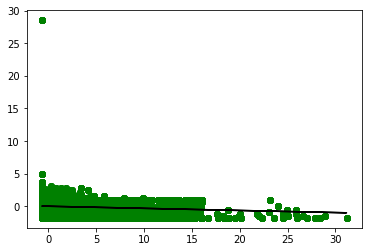

In [43]:
import matplotlib.pyplot as plt
plt.scatter(X_train, Y_train,color='g')
plt.plot(X_train, reg.predict(X_train),color='k')

In [45]:
param_grid = [
  {'C': [1, 10, 100, 1000]}
 ]

In [51]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
reg = svm.LinearSVR(max_iter=10000, loss="squared_epsilon_insensitive")
clf = GridSearchCV(reg, param_grid)
clf.fit(X_train[:10000], Y_train[:10000]);

c:\Info\KLAP\horse races prediction\env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Info\KLAP\horse races prediction\env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Info\KLAP\horse races prediction\env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Info\KLAP\horse races prediction\env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array w

In [55]:
import sys
sys.path.append('../')
from src.metrics.metriques import *


In [69]:
def invert_scale_target(data, scaler):
    return(scaler.var_[1]*data+scaler.mean_[1])
invert_scale_target(clf.predict(X_test), scaler)

array([5.91265317, 5.67043081, 5.60890689, 5.51117593, 5.50741488,
       5.50049906, 5.48630814, 5.48355753, 5.477102  , 5.45857747,
       5.45773544, 5.45038176, 5.44095109, 5.42248269, 5.35905018,
       5.34759865, 5.33204926, 5.97941448, 5.92472218, 5.9115866 ,
       5.86987833, 5.8531052 , 5.84554944, 5.84257428, 5.83024143,
       5.78337435, 5.76451301, 5.75881531, 5.7585627 , 5.74598847,
       5.74548325, 5.74295718, 5.7389716 , 5.72044706, 6.78027513,
       6.79689108, 6.78673065, 6.78156623, 6.77353893, 6.77156298,
       6.77752451, 6.77258464, 6.78083648, 6.81704353, 6.80486224,
       6.81053187, 6.92089321, 6.80340273, 6.92381222, 6.80396408,
       6.66362668, 6.62410767, 6.61664172, 6.61085982, 6.58486933,
       6.57684203, 6.55972087, 6.55461258, 6.55146903, 6.55101995,
       6.52817302, 6.52817302, 6.52688191, 6.52104388, 6.51262363,
       6.50869419, 6.50734695, 5.86997937, 5.72044706, 5.6748767 ,
       5.61375695, 5.49770354, 5.42051796, 5.40350907, 5.32964

In [73]:
def reg_to_rank(reg_list):
    """Returns a list of predictive results based on predictive regression

    Arguments:
        reg_list {[type]} -- [description]
    """
    return(np.argsort(reg_list)+1)

In [83]:
def metric_of_race(input_race, results_race, predictor, metric):
    preds = reg_to_rank(predictor(input_race))
    output = preds.copy()
    for i in range(len(output)):
       output[preds[i]] = results_race[i]
    return metric(output)
    

In [82]:
metric_of_race

array([3, 2, 1, 5, 4])